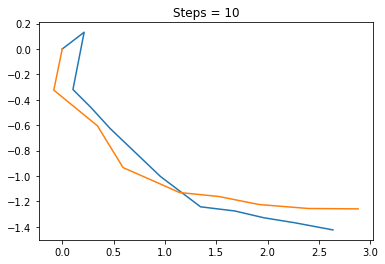

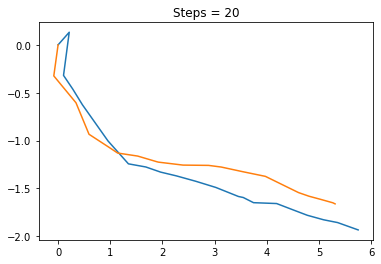

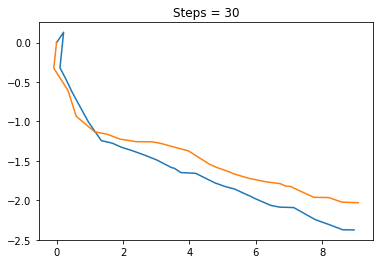

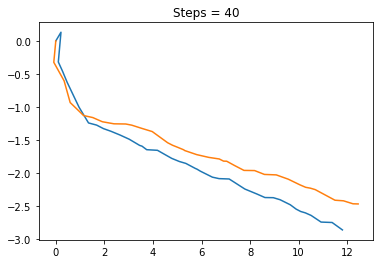

In [39]:
import random
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

N = 41 # number of steps
w = 2 # number of walkers
noutput = 10 # determins number of graphs

# From stack exchange, create function which can calculate the angle between line and x-axis

def angle_trunc(a):
    while a < 0.0:
        a += pi * 2
    return a

def AngleBtwPt(x_orig, y_orig, x_landmark, y_landmark):
    deltaY = y_landmark - y_orig
    deltaX = x_landmark - x_orig
    return angle_trunc(math.atan2(deltaY, deltaX))

# walker 1
w1 = [[0,0]]

# walker 2
w2 = [[0,0]]

# creating list of walkers
a = [w1,w2]

# angle list (one for each walker)
angles1 = []
angles2 = []


for iN in range(1,N):
    
    d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
    w1.append([sum(steps1) for steps1 in zip(w1[-1],d1)])

    d2 = [np.random.random() - 0.5,np.random.random() - 0.5]
    w2.append([sum(steps2) for steps2 in zip(w2[-1],d2)])
        
    for ik in range(1,iN): # ik = i check # for other avoidance
        
        for it in range(ik + 1): # calculate angles and find the max and min
        
            theta1 = AngleBtwPt(w1[iN - 2][0],w1[iN - 2][1],w2[it][0],w2[it][1])
            angles1.append(theta1)
        
            dthetamax1 = np.max(angles1)
            dthetamin1 = np.min(angles1)
            
        for it in range(ik + 1): # calculate angles and find the max and min
        
            theta2 = AngleBtwPt(w2[iN - 2][0],w2[iN - 2][1],w1[it][0],w1[it][1])
            angles2.append(theta2)
        
            dthetamax2 = np.max(angles2)
            dthetamin2 = np.min(angles2)

        while dthetamin1 <= AngleBtwPt(w1[iN - 1][0],w1[iN - 1][1],w1[iN][0],w1[iN][1]) <= dthetamax1: # checks if w1 ran into w2
                
            #print("max = " + str(dthetamax))
            #print("min = " + str(dthetamin))
            #print("w2[ik] = " + str(w2[ik]))

            w1.pop()

            d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
            w1.append([sum(steps1) for steps1 in zip(w1[-1],d1)])

        while dthetamin1 <= AngleBtwPt(w2[iN - 1][0],w2[iN - 1][1],w2[iN][0],w2[iN][1]) <= dthetamax1: # checks if w2 ran into w1

            w2.pop()

            d2 = [np.random.random() - 0.5,np.random.random() - 0.5]
            w2.append([sum(steps2) for steps2 in zip(w2[-1],d2)])

#         for ic in range(1,iN - 1): # for self avoidance

#             while math.dist(w1[iN],w1[ic]) < rs: # checks if w1 ran into w1

#                 w1.pop()

#                 d1 = [np.random.random() - 0.5,np.random.random() - 0.5]
#                 w1.append([sum(steps1) for steps1 in zip(w1[-1],d1)])

#             while math.dist(w2[ic],w2[iN]) < rs: # checks if w2 ran into w2

#                 w2.pop()

#                 d2 = [np.random.random() - 0.5,np.random.random() - 0.5]
#                 w2.append([sum(steps2) for steps2 in zip(w2[-1],d2)])
                
    # plot the positions of both walkers
    x1, y1 = zip(*w1)
    x2, y2 = zip(*w2)
        
    if (mod(iN,noutput)==0):
        plt.plot(x1,y1)
        plt.plot(x2,y2)
        plt.title('Steps = ' + str(iN))
        plt.show()

In [ ]:
iN

In [ ]:
w1[iN-1]

In [ ]:
w2[1]

In [32]:
AngleBtwPt(w1[iN - 1][0],w1[iN - 1][1],w1[iN][0],w1[iN][1])

6.26463347518536